### Classifier with TF-IDF vectors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import cross_validate
from sklearn import svm

In [2]:
train_set = pd.read_csv("dataset_train_pp.csv")
test_set = pd.read_csv("dataset_test_pp.csv")

In [3]:
print(len(train_set))
print(len(test_set))

50000
5000


In [4]:
train_x=train_set["Description"]
test_x=test_set["Description"]

train_y=train_set["Class Index"]
test_y=test_set["Class Index"]

In [5]:
%%time
test_x_vectors = np.load("tfidf_test_x.npy")
# test_x_vectors = np.load("w2v_test_x.npy")

CPU times: user 494 µs, sys: 247 ms, total: 248 ms
Wall time: 248 ms


In [6]:
%%time
train_x_vectors = np.load("tfidf_train_x.npy")
# train_x_vectors = np.load("w2v_train_x.npy")

CPU times: user 64.2 ms, sys: 4.3 s, total: 4.36 s
Wall time: 51.9 s


In [7]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion_matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], 
                horizontalalignment='center', 
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Naive Bays

In [8]:
naive_bays = MultinomialNB()

In [9]:
%%time
naive_bays.fit(train_x_vectors, train_y)

CPU times: user 6.61 s, sys: 978 ms, total: 7.59 s
Wall time: 3.06 s


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
nb_pred_x = naive_bays.predict(test_x_vectors)

In [11]:
accuracy_score(test_y,nb_pred_x)

0.8804

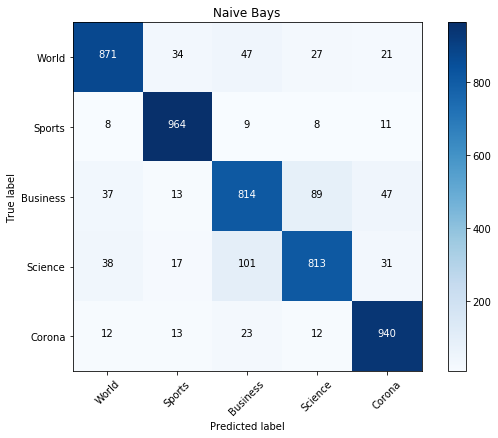

In [12]:
nb_cm = confusion_matrix(test_y, nb_pred_x)
cmPlotLabels = ['World', 'Sports', 'Business', 'Science', 'Corona']
plot_confusion_matrix(nb_cm, cmPlotLabels, title='Naive Bays')

### SVM

In [13]:
svm_model = svm.SVC(kernel='poly', degree=1, gamma='scale')

In [ ]:
%%time
# svm_model.fit(train_x_vectors, train_y)
svm_model.fit(test_x_vectors, test_y)

In [ ]:
svm_pred_x = svm_model.predict(test_x_vectors)

In [ ]:
accuracy_score(test_y,svm_pred_x)

In [ ]:
svm_cm = confusion_matrix(test_y, svm_pred_x)
plot_confusion_matrix(svm_cm, cmPlotLabelstitle='SVM, deg=1')

https://stackoverflow.com/questions/10592605/save-classifier-to-disk-in-scikit-learn